# NYC Airbnb Market Analysis (2019)

## Project Overview
This project analyzes the New York City Airbnb market using data from 2019. The goal is to understand price distribution, neighborhood popularity, and room type preferences across the five boroughs.

## Objectives
1. **Data Cleaning:** Handle missing values and remove outliers.
2. **Exploratory Data Analysis (EDA):** Understand the distribution of prices and availability.
3. **Visualization:** Use Seaborn and Matplotlib to visualize trends.
4. **Insights:** Identify the most expensive neighborhoods and the most popular room types.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
rooms_df= pd.read_csv("AB_NYC_2019.csv")
rooms_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0


## 1. Data Inspection & Initial Cleaning
First, we inspect the data types and check for missing values to ensure data integrity.

In [3]:
print(rooms_df.info())
print(rooms_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
#removing unnecessary columns
rooms_df.drop(columns=['id', 'host_name', 'last_review'], inplace=True)
rooms_df['reviews_per_month'] = rooms_df['reviews_per_month'].fillna(0)#filling the missing values by 0 in reviews_per_month
rooms_df.dropna(inplace=True) # remove any remaining rows that have missing data
rooms_df.info() #check



<class 'pandas.core.frame.DataFrame'>
Index: 48879 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48879 non-null  int64  
 2   neighbourhood_group             48879 non-null  object 
 3   neighbourhood                   48879 non-null  object 
 4   latitude                        48879 non-null  float64
 5   longitude                       48879 non-null  float64
 6   room_type                       48879 non-null  object 
 7   price                           48879 non-null  int64  
 8   minimum_nights                  48879 non-null  int64  
 9   number_of_reviews               48879 non-null  int64  
 10  reviews_per_month               48879 non-null  float64
 11  calculated_host_listings_count  48879 non-null  int64  
 12  availability_365                48879

In [5]:
#droping the outliers
rooms_filtered_df = rooms_df[rooms_df.price < 500] #creating new filtered df tha contains only the rooms with 500$ above in price column 
print(rooms_filtered_df.shape) #checking the shape of the new filtered df

(47644, 13)


## 2. Exploratory Data Analysis (EDA): 
Use grouping to analyze trends. and use correlations to check relationships between columns

In [6]:
#analysing the average price (mean) for every neighbourhood group
print(rooms_filtered_df.groupby("neighbourhood_group").price.mean())
# number of each room type in each neighbourhood_group
print(rooms_filtered_df.groupby(['neighbourhood_group', 'room_type']).size())

neighbourhood_group
Bronx             80.924144
Brooklyn         111.660074
Manhattan        161.092544
Queens            92.344583
Staten Island     91.144414
Name: price, dtype: float64
neighbourhood_group  room_type      
Bronx                Entire home/apt      375
                     Private room         648
                     Shared room           58
Brooklyn             Entire home/apt     9324
                     Private room       10083
                     Shared room          412
Manhattan            Entire home/apt    12410
                     Private room        7862
                     Shared room          475
Queens               Entire home/apt     2073
                     Private room        3363
                     Shared room          194
Staten Island        Entire home/apt      170
                     Private room         188
                     Shared room            9
dtype: int64


In [7]:
#checking the relationship between price and popularity (calculating correlation)
print(rooms_filtered_df['number_of_reviews'].corr(rooms_filtered_df.price))
print(rooms_filtered_df[['price', 'number_of_reviews']].corr()) #another way , This creates a 2x2 matrix

-0.045536466841688085
                      price  number_of_reviews
price              1.000000          -0.045536
number_of_reviews -0.045536           1.000000


## 2. Visualization:
Use Seaborn and Matplotlib to visualize trends 

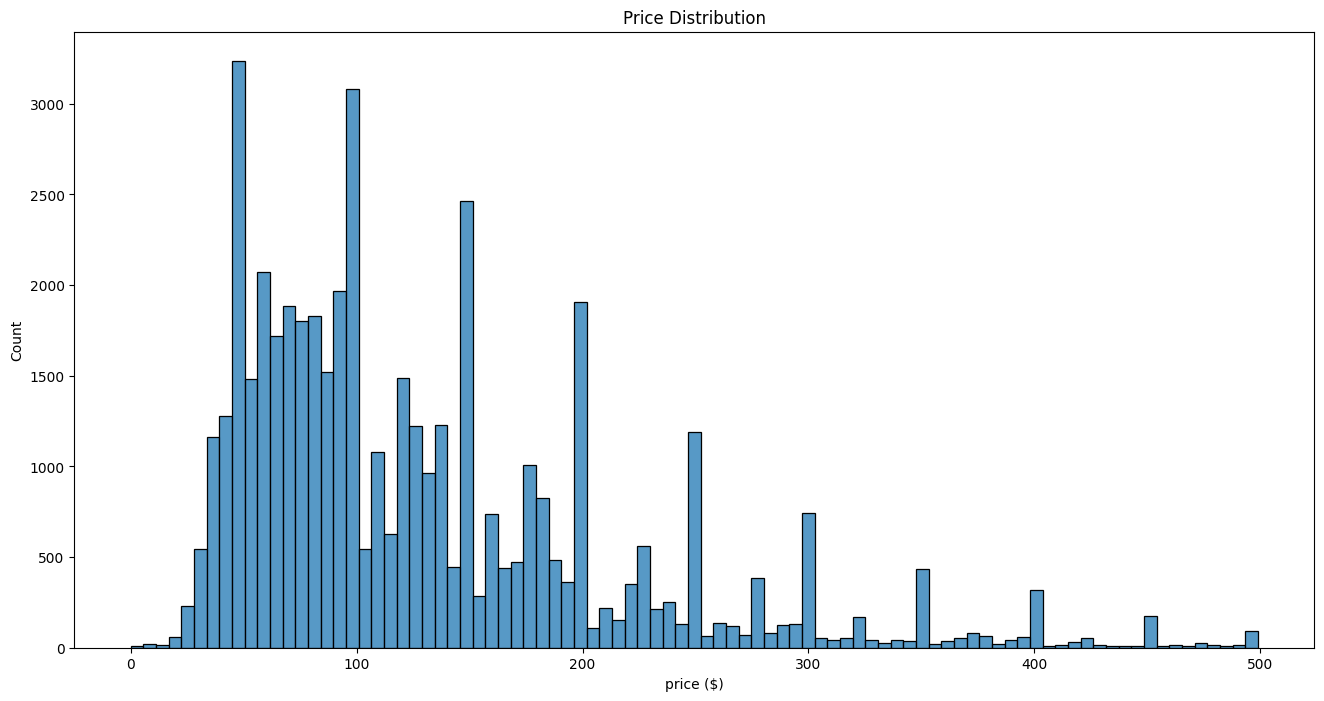

In [8]:
plt.figure(figsize=(16, 8))
sns.histplot(data= rooms_filtered_df.price)
plt.title("Price Distribution")
plt.xlabel('price ($)')
plt.show()


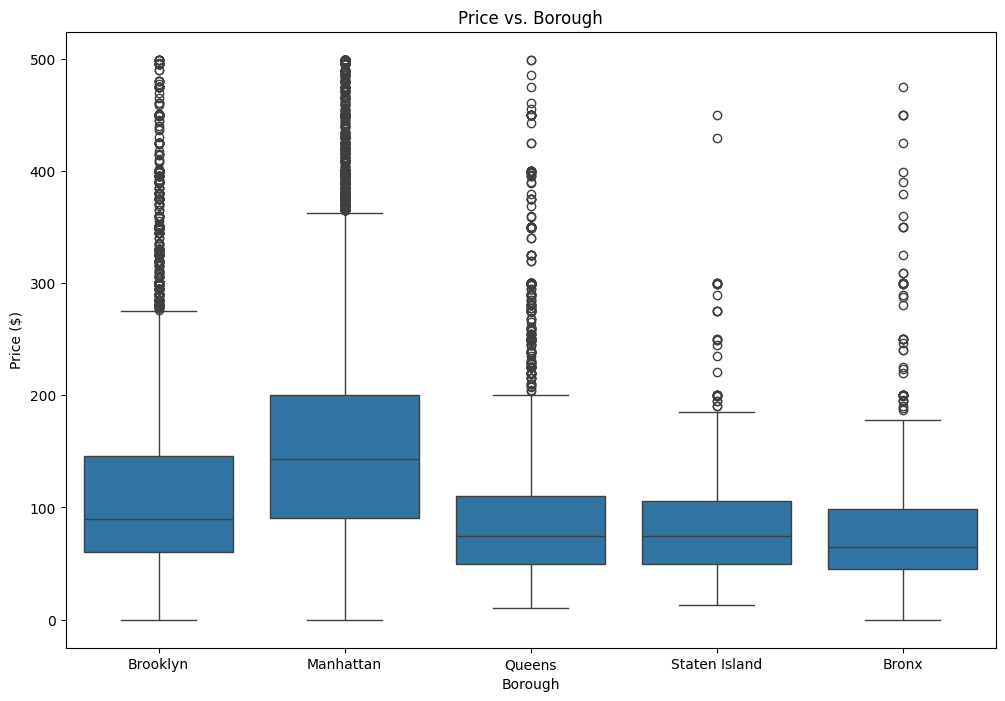

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=rooms_filtered_df, x="neighbourhood_group", y='price')
plt.ylabel("Price ($)")
plt.xlabel("Borough")
plt.title("Price vs. Borough")
plt.show()


Boxplot components (for the seaborn/matplotlib boxplot of price by borough):

- Box: spans Q1 (25th percentile) to Q3 (75th percentile). It contains the middle 50% of prices.
- Median: the horizontal line inside the box = 50th percentile (typical central value).
- IQR (Interquartile Range): Q3 - Q1, shows spread of the middle 50%.
- Whiskers: extend to the most extreme data points within 1.5 * IQR from the quartiles (default). They represent the typical data range excluding outliers.
- Outliers: individual points beyond the whiskers (below Q1 - 1.5*IQR or above Q3 + 1.5*IQR). In the price plot these are unusually low or high-priced listings.
- Interpretation tips:
    - A higher median line → higher typical price for that borough.
    - A taller box → greater variability in typical prices.
    - Long whiskers or many outliers → skewed distribution and extreme prices.
    - Compare medians and IQRs across neighbourhood_group to see which boroughs are more expensive or more variable.

Note: boxplots show medians by default; the mean is not shown unless you set showmeans=True.

Text(0.5, 1.0, 'the composition of room types in each Borough')

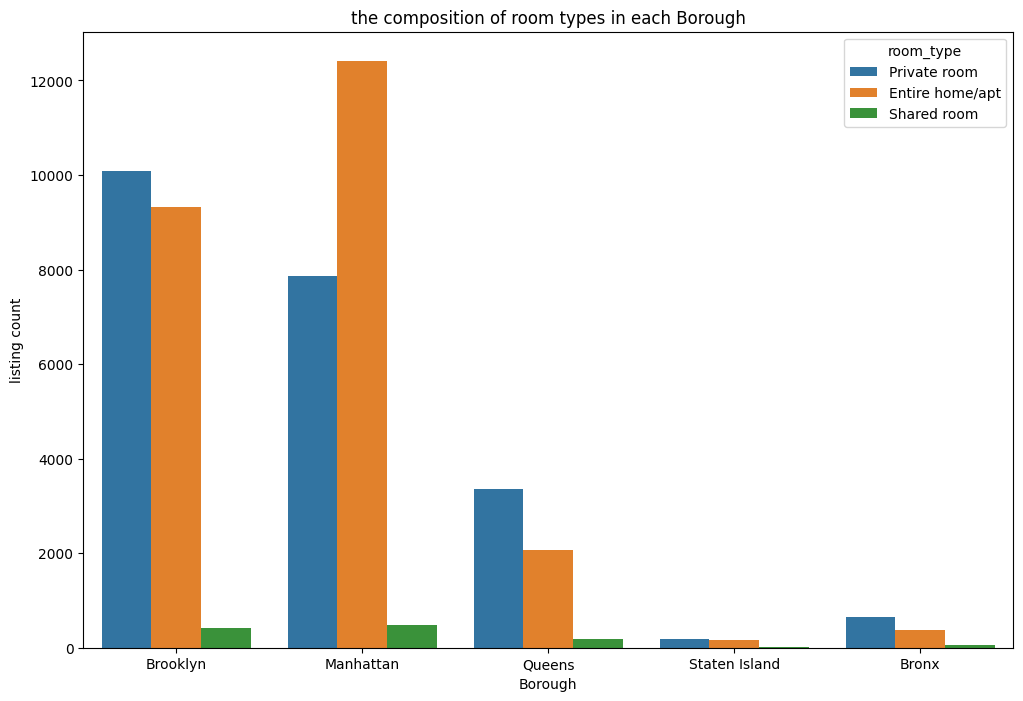

In [10]:
#
plt.figure(figsize=(12, 8))
sns.countplot(data=rooms_filtered_df, x='neighbourhood_group', hue='room_type' )
plt.xlabel("Borough")
plt.ylabel("listing count")
plt.title("the composition of room types in each Borough")


                                 host_id  latitude  longitude     price  \
host_id                         1.000000  0.018597   0.133527  0.007715   
latitude                        0.018597  1.000000   0.086715  0.069774   
longitude                       0.133527  0.086715   1.000000 -0.295500   
price                           0.007715  0.069774  -0.295500  1.000000   
minimum_nights                 -0.018859  0.025695  -0.064526  0.027082   
number_of_reviews              -0.138833 -0.013851   0.056880 -0.045536   
reviews_per_month               0.211517 -0.017747   0.138515 -0.047741   
calculated_host_listings_count  0.152346  0.019652  -0.115459  0.172368   
availability_365                0.200444 -0.013086   0.090417  0.092041   

                                minimum_nights  number_of_reviews  \
host_id                              -0.018859          -0.138833   
latitude                              0.025695          -0.013851   
longitude                            -0.06

<Axes: >

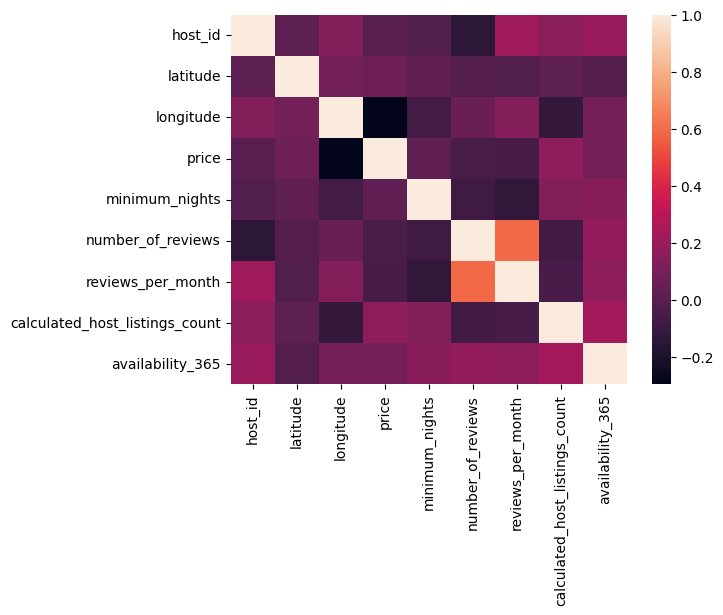

In [11]:
#calculating correlation between numerical column to identify relationships easily
data_corr = rooms_filtered_df.select_dtypes(include=['number']).corr()
print(data_corr)
sns.heatmap(data=data_corr)

## 5. Key Insights & Conclusion

This Exploratory Data Analysis (EDA) successfully confirmed several key patterns within the NYC Airbnb market data, validating the need for the cleaning and visualization steps we performed.

### Major Findings:

| Finding | Supported By | Analytical Insight |
| :--- | :--- | :--- |
| **Price Centralization** | **Box Plot & Heatmap** | Manhattan has the highest median price and the widest range of expensive listings. The **negative correlation between price and longitude** confirms that proximity to central Manhattan strongly drives value. |
| **Market Supply** | **Count Plot** | Brooklyn and Manhattan dominate total listing volume. However, Manhattan's market is primarily **'Entire home/apt'**, while Brooklyn has a higher concentration of **'Private Rooms'**, appealing to different traveler segments. |
| **Rental Behavior** | **Heatmap** | A strong **negative correlation** was found between **`minimum_nights`** and **`reviews_per_month`**. This indicates that listings requiring longer stays receive significantly *fewer* reviews per month, likely because they have less turnover. |

### Conclusion:

The project demonstrated that pricing and supply are highly segmented geographically. By filtering the data and applying group-by analysis, we can confidently identify that **Manhattan** is the premium, whole-home market, while **Brooklyn** offers the greatest volume and more affordable options, largely driven by private room availability.